In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

import os

for directory,_,filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(directory,filename))

data/data.parquet
data/train.parquet
data/test.parquet
data/data.csv


In [13]:
data = pd.read_parquet('data/data.parquet')

In [17]:
data.head(2)

,categoryId,view_count,likes,dislikes,comment_count,duration_seconds,has_thumbnail,target,description_len,is_comments_disabled,...,pokemon brilliant diamond shining pearl exploits,Matrix Part 2,barista asmr,back pay,dreamworks,Munir,cyber monday treadmills,Tichina Arnold Soul Train Awards,ROMAN TOO LIT,I was in MrBeast Squid Game
0,17,540613,7155,308,1647,1112.0,1,0.013235,239,0,...,0,0,0,0,0,0,0,0,0,0
1,23,430836,37754,256,4818,1083.0,1,0.087630,70,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X = data.drop(['likes','view_count','dislikes','comment_count'],1)
ylikes = data['likes']
yviews = data['view_count']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, ylikes, test_size=0.5, random_state=42)

In [24]:
scaler = MinMaxScaler()

In [26]:
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

********** LinearRegression() **********
MSE: 2518721153.4468436
SRMSE: 50186.86235905612
MAE: 36466.007062394936
r2: 0.25277509033306045


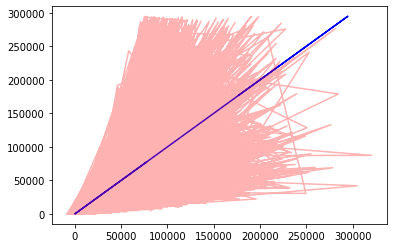

********************
********** Ridge() **********
MSE: 2518865140.8858633
SRMSE: 50188.2968518146
MAE: 36527.15430134437
r2: 0.25273237381362057


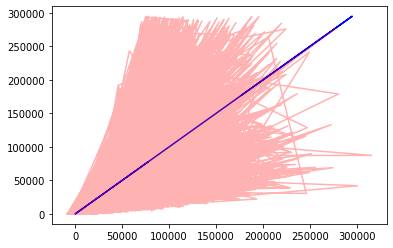

********************
********** Lasso() **********
MSE: 2518717822.7308517
SRMSE: 50186.82917589885
MAE: 36468.484073120504
r2: 0.2527760784511588


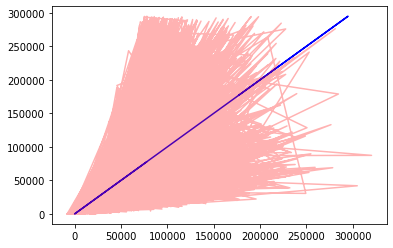

********************
********** AdaBoostRegressor() **********
MSE: 2503135250.2965684
SRMSE: 50031.342679330206
MAE: 37941.107347951605
r2: 0.2573989348811575


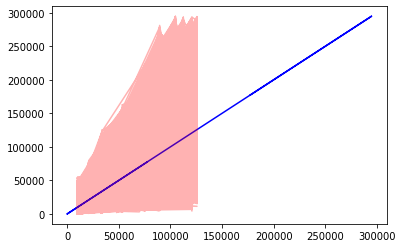

********************
********** DecisionTreeRegressor() **********
MSE: 2271030177.1471043
SRMSE: 47655.326849651385
MAE: 24538.163397981665
r2: 0.3262571695769686


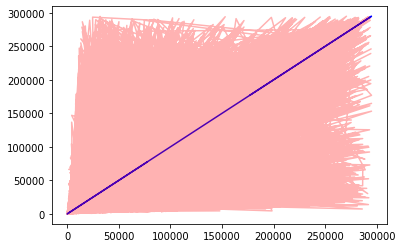

********************
********** RandomForestRegressor() **********
MSE: 1153997508.3436215
SRMSE: 33970.53882916227
MAE: 21409.042745971947
r2: 0.6576454353639374


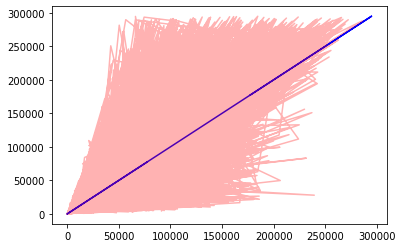

********************


In [29]:
models = [LinearRegression(),Ridge(),Lasso(),AdaBoostRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('*'*10,model,'*'*10)
    print(f'MSE: {mean_squared_error(y_test,pred)}')
    print(f'SRMSE: {np.sqrt(mean_squared_error(y_test,pred))}')
    print(f'MAE: {mean_absolute_error(y_test,pred)}')
    print(f'r2: {r2_score(y_test,pred)}')
    
    df_res = pd.DataFrame()
    df_res['actual'] = y_test
    df_res['pred'] = pred
    df_res['MSE'] = mean_squared_error(y_test,pred)
    df_res['error'] = y_test - pred
    
    plt.plot(df_res['actual'],df_res['actual'],'b',alpha=1)
    plt.plot(df_res['pred'],df_res['actual'],'r',alpha=0.3)
    plt.show()
    print('*'*20)


